In [71]:
using Pkg
Pkg.activate("pidc")

  Activating project at `/data/gpfs/projects/punim0638/stephenz/locaTE-paper/examples/cellcycle_metabolic/pidc`


In [79]:
using NetworkInference

In [80]:
n = infer_network("expr.csv", PIDCNetworkInference(); delim = ',');
w = [e.weight for e in n.edges]
e = [(e.nodes[1].label, e.nodes[2].label) for e in n.edges];

Getting nodes...
Inferring network...


In [81]:
genes = [x.label for x in n.nodes];

In [82]:
N_g = length(n.nodes)
A = zeros(N_g, N_g)
for (w_, e_) in zip(w, e)
    A[findfirst(x -> x == e_[1], genes)[1], 
      findfirst(x -> x == e_[2], genes)[1]] = w_
end

In [83]:
A = A + A';

In [84]:
using NPZ
npzwrite("A_pidc.npy", A);

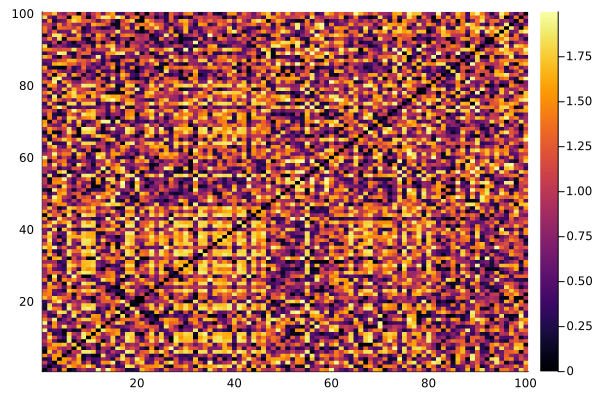

In [85]:
using Plots
heatmap(A)